In [20]:
import numpy as np
import tensorflow as tf
attacked_dirpath = '/Users/haekyu/data/massif/attacked/panda-armadillo'


In [8]:
epss = [1.0]
for eps in epss:
    attacked_datapath = '{}/{}-{}.npy'.format(attacked_dirpath, 'attacked', eps)
    data = np.load(attacked_datapath)

In [9]:
data.shape

(1, 224, 224, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


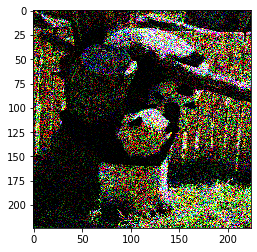

In [12]:
import matplotlib.pyplot as plt

plt.imshow(data[0])
plt.show()

In [13]:
from massif.model import InceptionV1Model


In [21]:
def get_predictions(model, imgs):
    graph = tf.Graph()
    with tf.Session(graph=graph) as sess:
        x = tf.placeholder(tf.float32, (None, 224, 224, 3))
        y = model.get_probs(x)
        y = tf.argmax(y, 1)
        y_eval = sess.run(y, feed_dict={x: imgs})

    # One batch
    y_eval = y_eval[0]

    return y_eval

model = InceptionV1Model()

In [23]:
predicted_class = get_predictions(model, [data[0]])
predicted_class

178